## Predicting Housing Price - An introduction of exploratory data visualizations in Python 

The following sessions will cover exploratory data visualizations for the below objectives:
* 1 Quality of data - volume,variety and quality; 
* 2 Individual variables - their distribution and relationship to the target variable; 
* 3 Relationship among variables

First,set up some logistics...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

Next,examine the overall dataset without digging into too much detail.

### Quality of data 

In [3]:
### Import data
train = pd.read_csv('C:/Users/Insights/Desktop/Kaggle Predicting Housing Price/train.csv')

In [4]:
### Shape of data
train.shape

(1460, 81)

In [5]:
### Columns of data
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
### Sample data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
### Completeness of data
missing = train.isnull().sum()
missing.sort(ascending=False)
missing[0:20]

C:\Users\Insights\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

Note that there are quite a few variables with missing values. We further examine if the missingness is random or has some patterns. We use missingno library to further examine the missingness of data. 

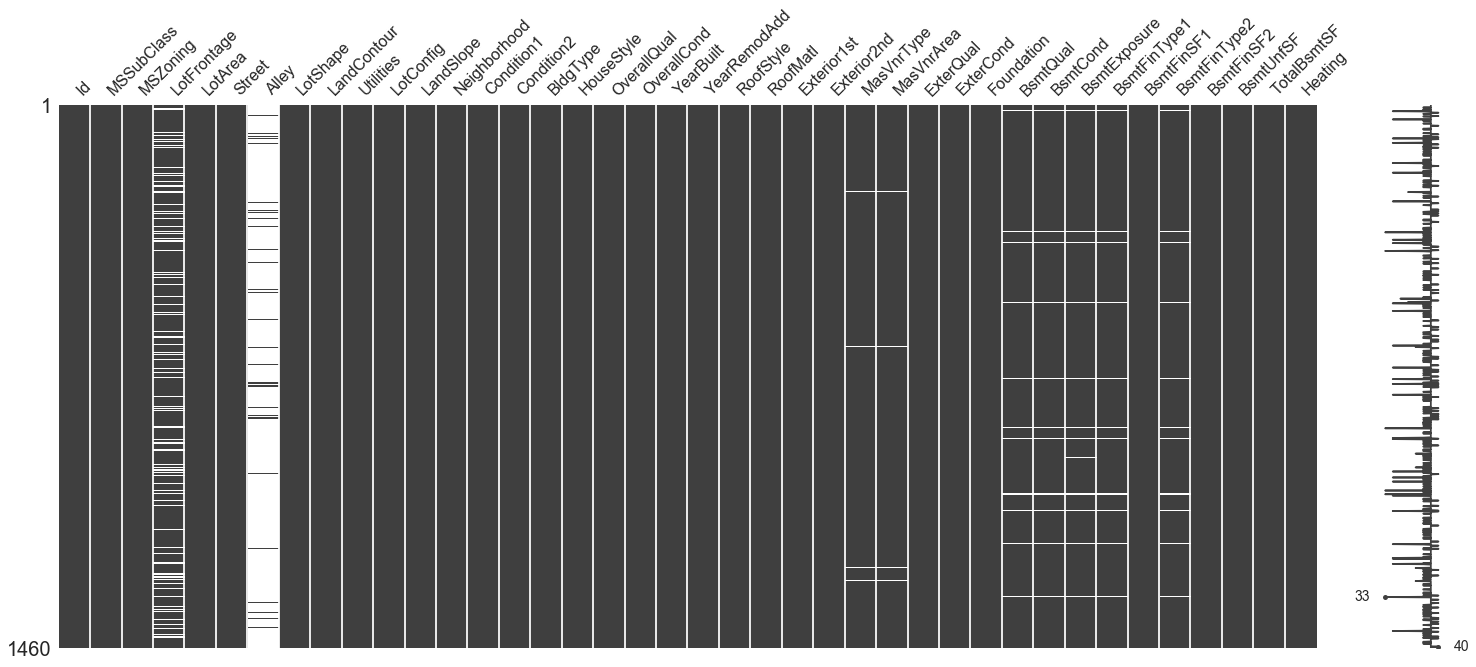

In [8]:
import missingno as mn
mn.matrix(train.iloc[:,0:40])

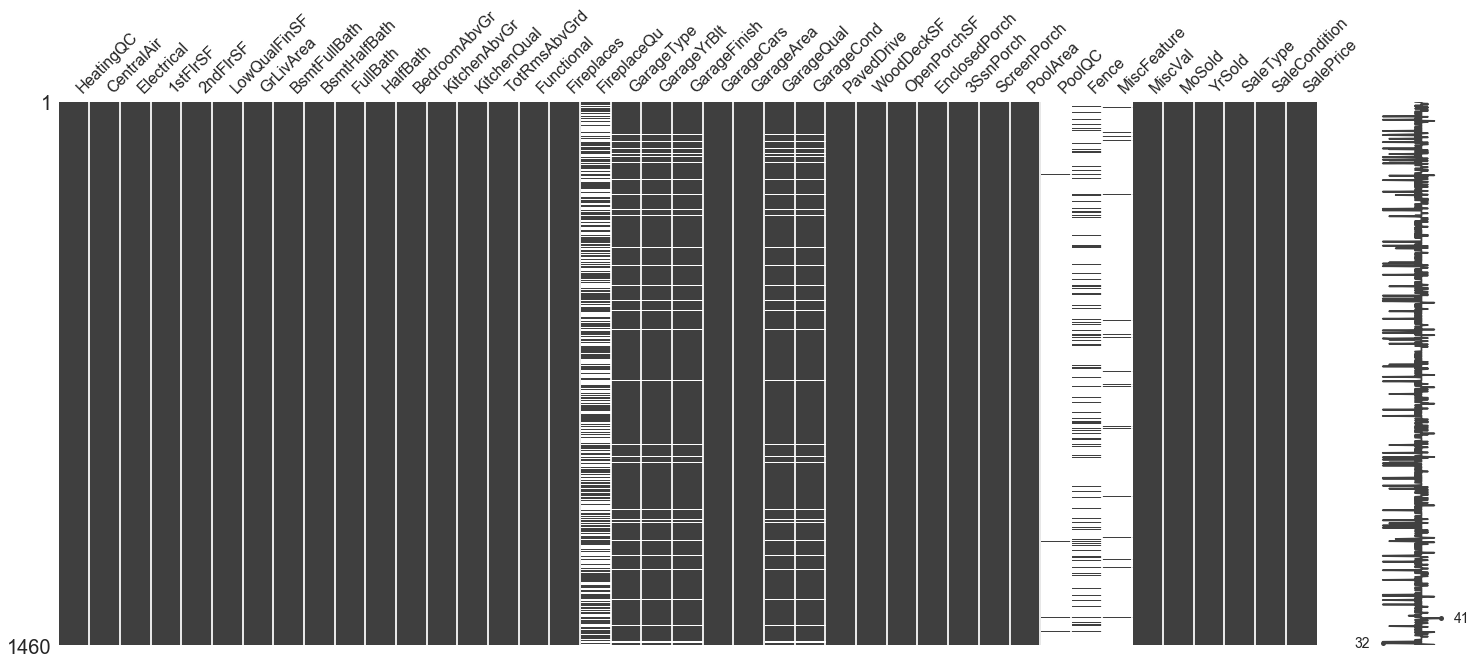

In [9]:
mn.matrix(train.iloc[:,40:])

We can also use heatmap.(Quotes from package developer's Github):
* Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does). 
* Entries marked <1 or >-1 are have a correlation that is close to being exactingly negative or positive, but is still not quite perfectly so.

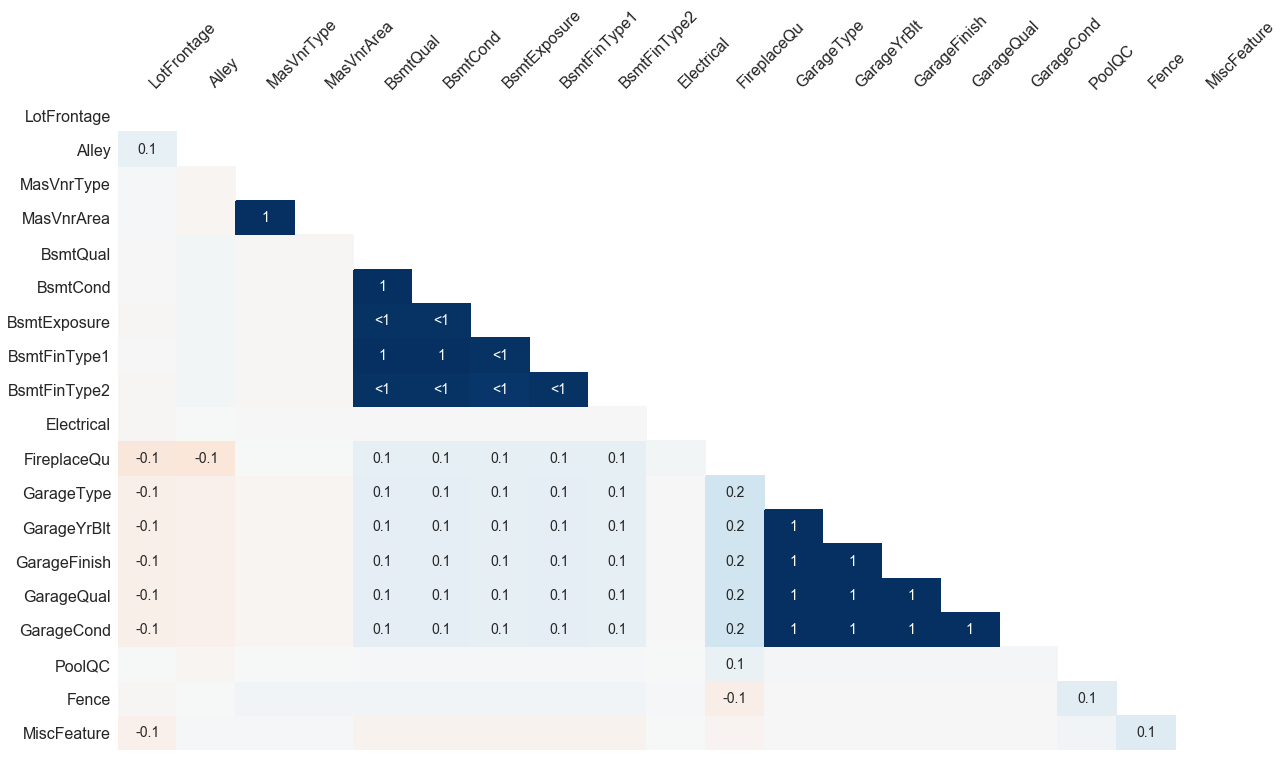

In [10]:
mn.heatmap(train)

The heatmap works great for picking out data completeness relationships between variable pairs, but its visual power is limited when it comes to larger relationships. In this case, we can also try the dendrogram which allows us to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap.

For example, in our case it is revealed that GarageCond,GarageQual,GarageFinish,GarageType and GarageYrBlt are missing/complete together - which is expected.

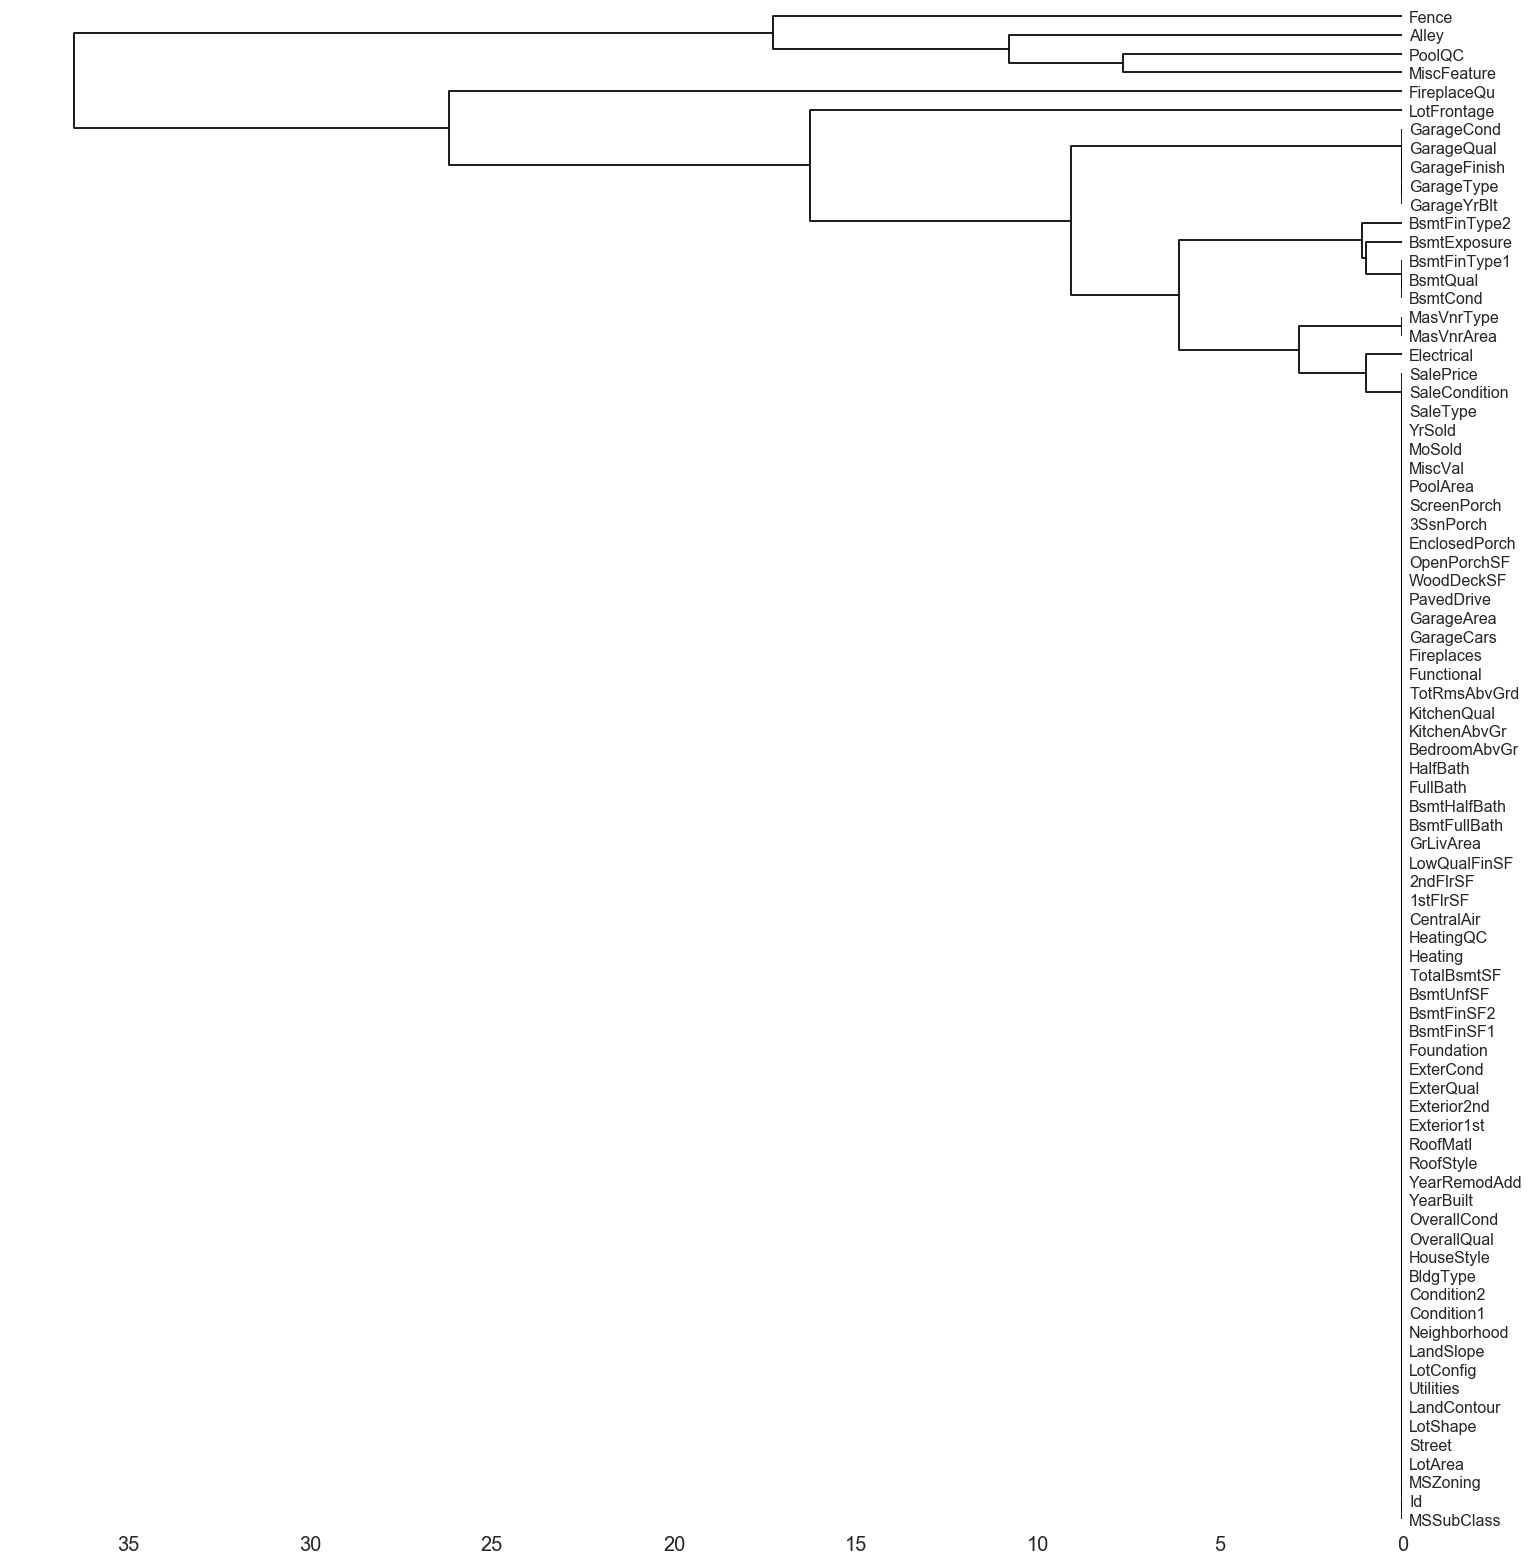

In [11]:
mn.dendrogram(train)

### Indivisual variables and their relationship to target variable 

Next, we move on to examine individual variables.First, we classify the variables into two groups in our case: Categorical and Numeric.

In [20]:
categorical = train.select_dtypes(include=['object']).columns.values
numeric = train.select_dtypes(include=['float64', 'int64']).columns.values

In [18]:
categorical

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'], dtype=object)

In [19]:
numeric

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'], dtype=object)

We then plot their individual distributions and associations with target variable. Seaborn is a very handy package for data visualizations. Below is a quick reference for some of the most popular visualizations:


| Plot Type       | Categorical Type             | Numeric Type      |
| -------------   |------------------------------| ------------------|
| Individual Plot | countplot                    | kdeplot           |
| Association Plot| boxplot,violinplot,factorplot| regplot,jointplot |

### Categorical Variable Plots 

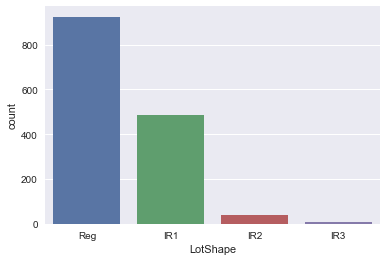

In [12]:
sns.countplot('LotShape',data=train)

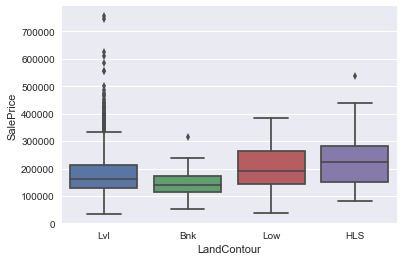

In [13]:
sns.boxplot('LandContour','SalePrice',data=train)

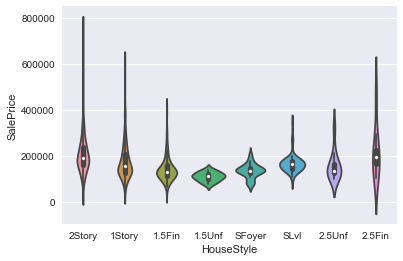

In [14]:
sns.violinplot('HouseStyle','SalePrice',data=train)

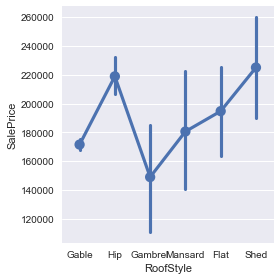

In [15]:
sns.factorplot('RoofStyle','SalePrice',data=train)

### Numeric Plots 

C:\Users\Insights\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


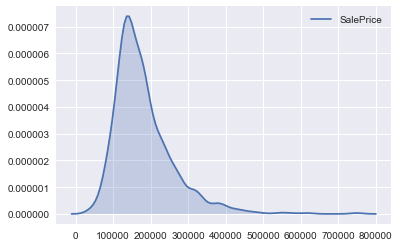

In [16]:
sns.kdeplot(train['SalePrice'],shade=True)

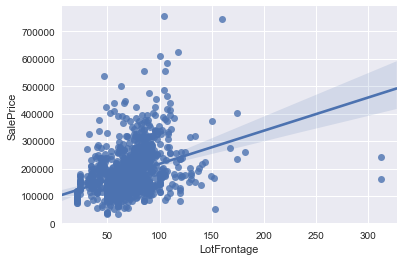

In [17]:
sns.regplot('LotFrontage','SalePrice',data=train)

C:\Users\Insights\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


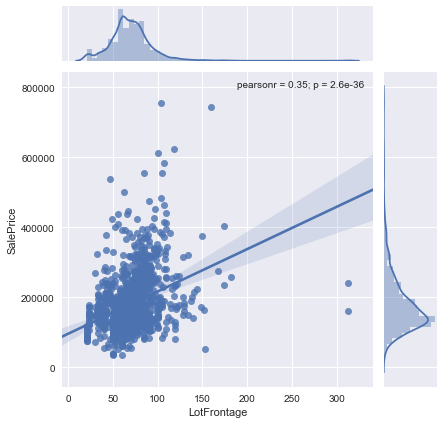

In [18]:
sns.jointplot('LotFrontage','SalePrice',kind='reg',data=train)

In practice, sometimes it is too tedious to plot one by one. So we could plot them all at one time using subplots.

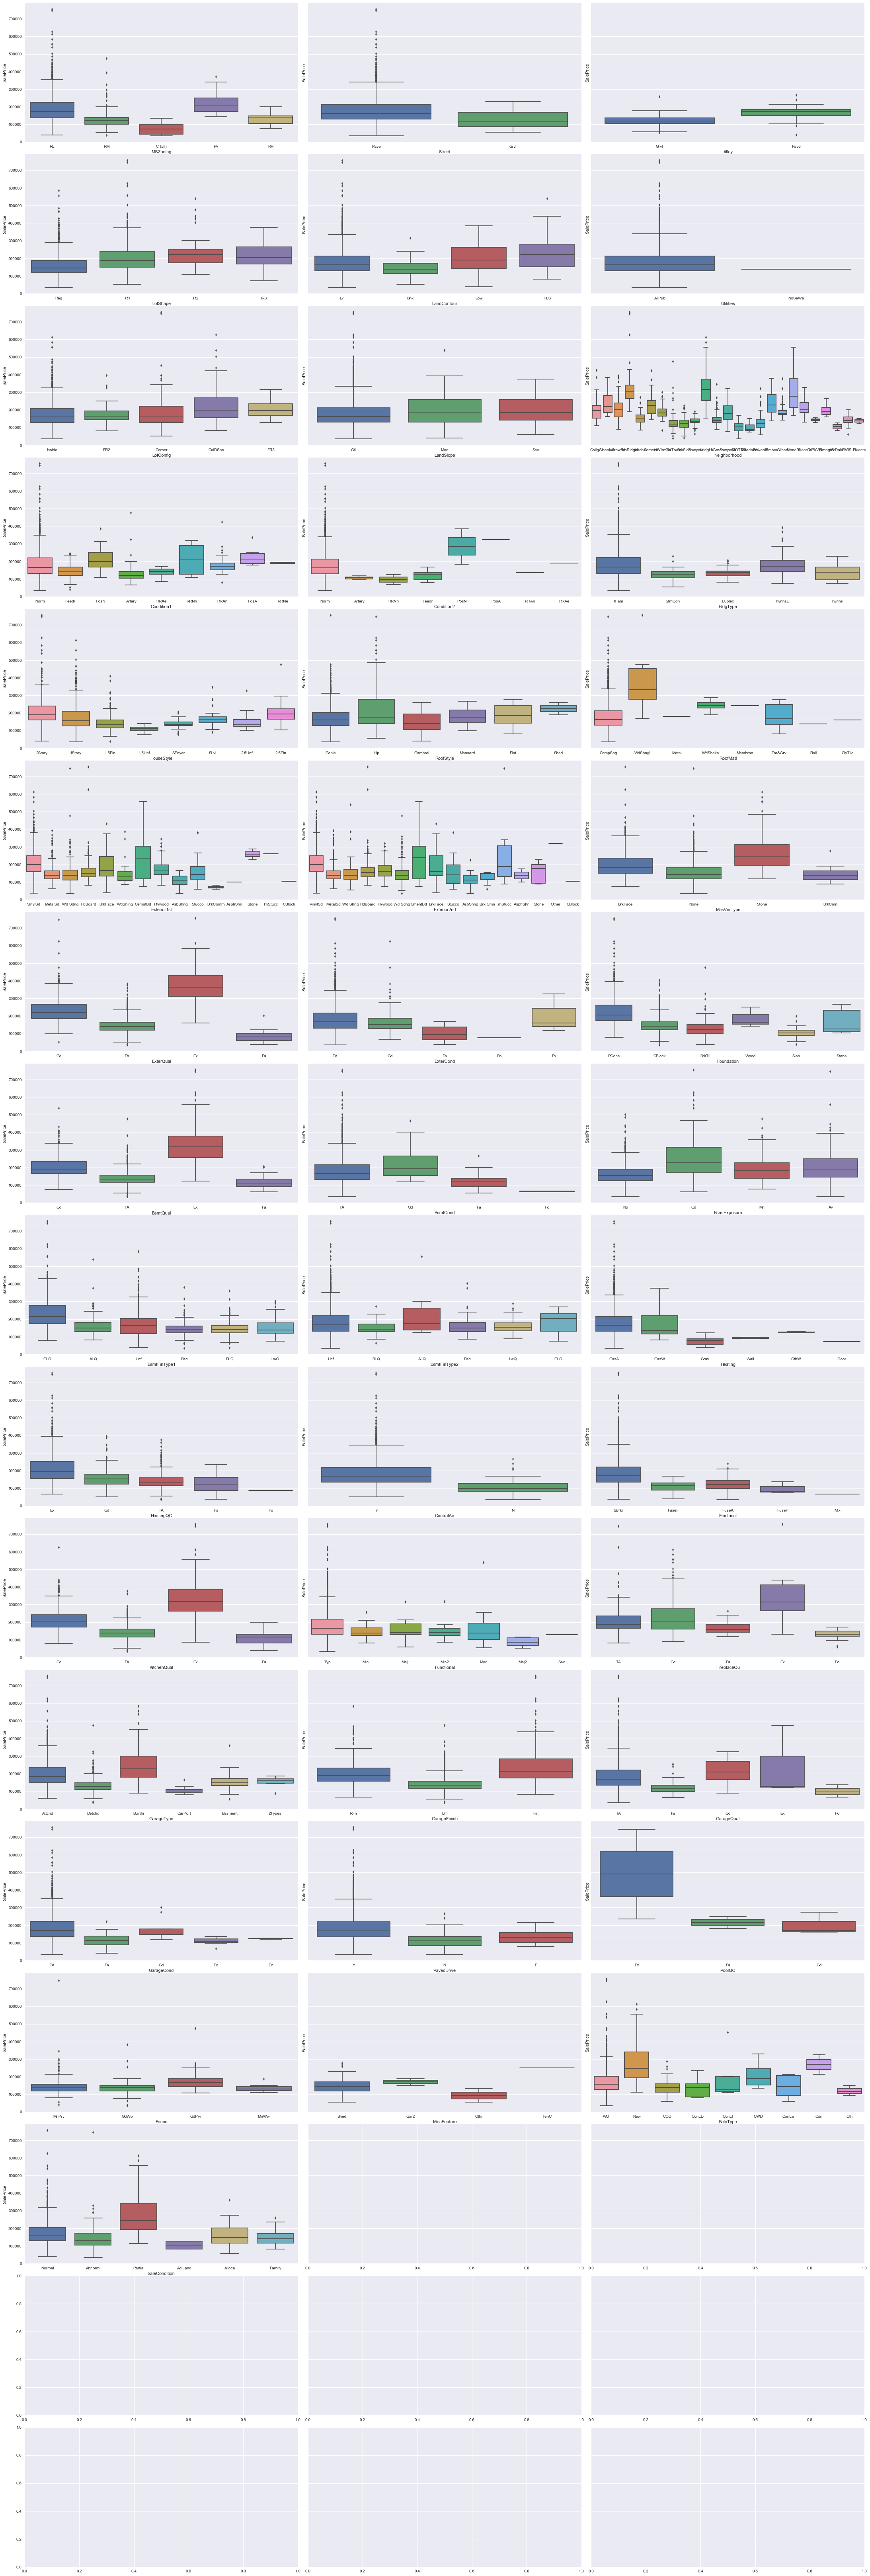

In [21]:
Categorical_Variable = train[categorical]
fig,ax = plt.subplots(17,3,figsize=(30,90),sharey='row')
fig.tight_layout()
for i in range(17):
    for j in range(3):
        if((j+i*3)<len(Categorical_Variable.columns)):
            sns.boxplot(Categorical_Variable.iloc[:,(i*3+j)],train['SalePrice'],ax=ax[i, j])

### Relationship among variables

Very ofthen we need to examine the correlations between individual variables. Below are two examples.

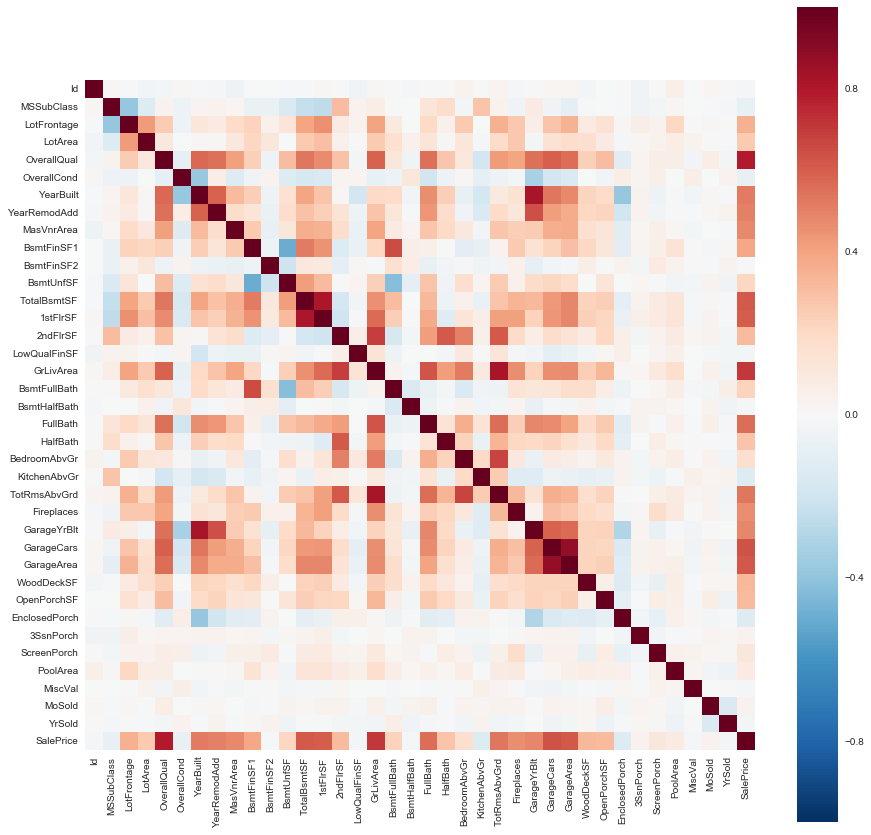

In [22]:
### Numeric Variable Correlations
plt.figure(figsize=(15, 15))
sns.heatmap(train[numeric].corr(), vmax=1, square=True)

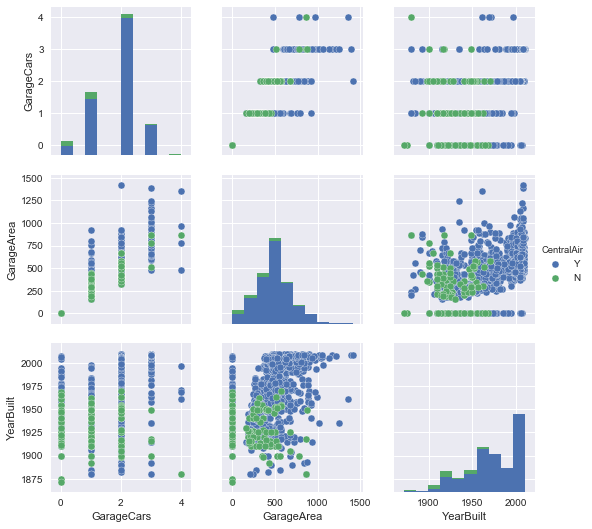

In [53]:
### Relationship among a group of variables
sns.pairplot(train[['GarageCars', 'GarageArea','CentralAir','YearBuilt']],hue='CentralAir',dropna=True)

### One more experiment - GIS Analysis 

As we all know housing price is highly associated with locations. We could potentially consider geo-spatial analysis based features. Below is an experiment. Note that I did not get a very accurate location data of the neighborhood - I just googled it and use whatever comes first from google map. Ideally we should have the coordinates of the boundaries of the neighboorhood for such analysis. Someone please let me know if you have the shp file for the neighborhoods! 

In [26]:
#Get Latitude and Longitude information from Google Maps
Neighborhood = pd.Series(train['Neighborhood'].unique())
Latitute = pd.Series([42.02430750000001,42.04163980000001,42.028025,42.0483583,
            41.9903084,42.05262800000001,42.04225588928407,42.028662,
            42.02894990000001,42.0264466,42.046226,42.05602272533084,
            42.0339027,42.02158370000001,42.0087108,42.0153961,
            42.0005053,42.1069288,42.0594717,42.03609670000001,
            41.903737,42.05641859999999,42.52281079999999,42.02279876924051,42.02528542979918])
Longitute = pd.Series([-93.63776339999998,-93.64912199999998,-93.60713989999999,-93.64671069999997,
             -93.60105329999999,-93.64458200000001,-93.67101289099082,-93.61730299999999,
             -93.62974759999997,-93.66832699999998,-93.6529104,-93.64080048864707,
             -93.67706579999998,-93.6687523,-93.6749451,-93.6853572,
             -93.64974869999998,-93.64966279999999,-93.63333649999998,-93.6488301,
             -93.603069,-93.6352364,-93.28389270000002,-93.654121402069,-93.66673850803636])
Location_Data = pd.concat([Neighborhood,Latitute,Longitute],axis=1)
Location_Data.columns = ['Neighborhood','Latitute','Longitute']

In [27]:
Location_Data.head()

,Neighborhood,Latitute,Longitute
0,CollgCr,42.024308,-93.637763
1,Veenker,42.041640,-93.649122
2,Crawfor,42.028025,-93.607140
3,NoRidge,42.048358,-93.646711
4,Mitchel,41.990308,-93.601053


In [28]:
### Get median price of the neighborhood housing price and number of houses sold
volume_median = train.groupby('Neighborhood').aggregate({'Id':'count','SalePrice':'median'})
volume_median.reset_index(inplace=True)
Location_Data2= pd.merge(Location_Data,volume_median,on='Neighborhood',how='left')
Location_Data2.columns = ['Neighborhood','Latitute','Longitute','Count','SalePrice']
Location_Data2.head()

,Neighborhood,Latitute,Longitute,Count,SalePrice
0,CollgCr,42.024308,-93.637763,150,197200
1,Veenker,42.041640,-93.649122,11,218000
2,Crawfor,42.028025,-93.607140,51,200624
3,NoRidge,42.048358,-93.646711,41,301500
4,Mitchel,41.990308,-93.601053,49,153500


In [29]:
from mpl_toolkits.basemap import Basemap
lat = Location_Data2['Latitute'].values
lon = Location_Data2['Longitute'].values
volume = Location_Data2['Count'].values
price = Location_Data2['SalePrice'].values

C:\Users\Insights\AppData\Local\Continuum\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3310: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\Insights\AppData\Local\Continuum\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3319: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
C:\Users\Insights\AppData\Local\Continuum\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3236: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\Insights\AppData\Local\Continuum\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3245: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


http://server.arcgisonline.com/ArcGIS/rest/services/World_Physical_Map/MapServer/export?bbox=-93.7,41.95,-93.55,42.08&bboxSR=4269&imageSR=4269&size=5000,4333&dpi=96&format=png32&f=image


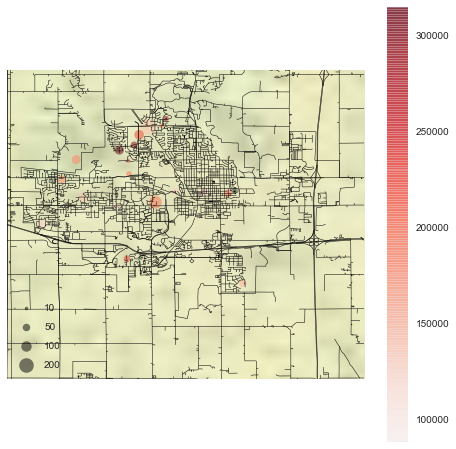

In [30]:
fig = plt.figure(figsize=(8,8))
m = Basemap(llcrnrlon=-93.7,llcrnrlat=41.95,urcrnrlon=-93.55,urcrnrlat=42.08,epsg=4269)
m.shadedrelief()
m.drawstates(color='grey')
m.scatter(lon,lat,latlon=True,c=price,s=volume,cmap='Reds',alpha=0.5)
m.arcgisimage(service='World_Physical_Map',xpixels=5000,verbose=True)
### Download shp files from online resources. Coulld not find any file related to Ames' neighborhood so
### the visualization is not really helpful -just serve the purpose of demonstration
m.readshapefile('C:/Users/Insights/Desktop/Kaggle Predicting Housing Price/iowa_administrative/iowa_administrative','iowa_administrative')
m.readshapefile('C:/Users/Insights/Desktop/Kaggle Predicting Housing Price/iowa_highway/iowa_highway','iowa_highway')
plt.colorbar()

for a in [10,50,100,200]:
    plt.scatter([],[],c='k',alpha=0.5,s=a,label=str(a))
plt.legend(scatterpoints=1,frameon=False,labelspacing=1,loc='lower left')


In the graph above, color intensity indicates the median housing price. Size of the dot indicates the total number of sales. 